Covid19 adalah pandemi yang sudah mewabah ke seluruh dunia. Sebagian besar negara-negara di dunia sudah terjangkit. Penanganan tiap-tiap negara pun berbeda, sesuai dengan kebijakan pemerintah. Hal ini mengakibatkan perbedaan trend kenaikan atau penurunan kasus covid berbeda-beda tiap negara.

Pada kasus kali ini, kita akan mencoba menggali data covid19 dari salah satu open api yang tersedia yaitu https://covid19-api.org/.

In [43]:
# Import library yang digunakan
import json
import numpy as np
import pandas as pd
import requests
import datetime
import matplotlib.pyplot as plt

Membuat fungsi get_json. fungsi ini akan mengembalikan value berupa python dictionary jika status_code yang dihasilkan adalah 200. Jika tidak, maka value yang dikembalikan adalah None.

In [44]:
def get_json(api_url):
	response = requests.get(api_url)
	if response.status_code == 200:
		return json.loads(response.content.decode('utf-8'))
	else:
		return None

In [45]:
record_date = '2020-09-06' # mengambil data COVID-19 di seluruh negara pada tanggal tertentu 
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.json_normalize(get_json(covid_url))

print(df_covid_worldwide.head())

  country          last_update    cases  deaths  recovered
0      US  2020-09-05T23:28:28  6242039  188501    2302187
1      BR  2020-09-05T23:28:28  4092832  125521    3467525
2      IN  2020-09-05T23:28:28  4023179   69561    3107223
3      RU  2020-09-05T23:28:28  1017131   17707     835884
4      PE  2020-09-05T23:28:28   676848   29554     498523


In [46]:
# mengubah format kolom last_update
df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], format='%Y-%m-%d %H:%M:%S')
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x: x.date())

In [47]:
countries_url = 'https://covid19-api.org/api/countries' # mengambil variable countries_url ke api covid19-api.org
df_countries = pd.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2': 'country'})[['name','country']] #ubah nama kolom alpha2 menjadi country dan mengambil hanya kolom name dan country untuk df_countries

In [48]:
# menggabungkan df_covid_worldwide dan df_countries.
df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on='country')
print(df_covid_denormalized)

    country last_update    cases  deaths  recovered                      name
0        US  2020-09-05  6242039  188501    2302187  United States of America
1        BR  2020-09-05  4092832  125521    3467525                    Brazil
2        IN  2020-09-05  4023179   69561    3107223                     India
3        RU  2020-09-05  1017131   17707     835884        Russian Federation
4        PE  2020-09-05   676848   29554     498523                      Peru
..      ...         ...      ...     ...        ...                       ...
201      GG  2020-03-17        0       0          0                  Guernsey
202      GL  2020-03-19        0       0          0                 Greenland
203      GU  2020-03-18        0       0          0                      Guam
204      JE  2020-03-17        0       0          0                    Jersey
205      PR  2020-03-17        0       0          0               Puerto Rico

[206 rows x 6 columns]


In [50]:
# menambahkan satu kolom tambahan yaitu fatality_ratio, yang merupakan pembagian antara kolom deaths dan cases.
df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths'] / df_covid_denormalized['cases']

In [51]:
df_top_10_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio', ascending=False).head(10)

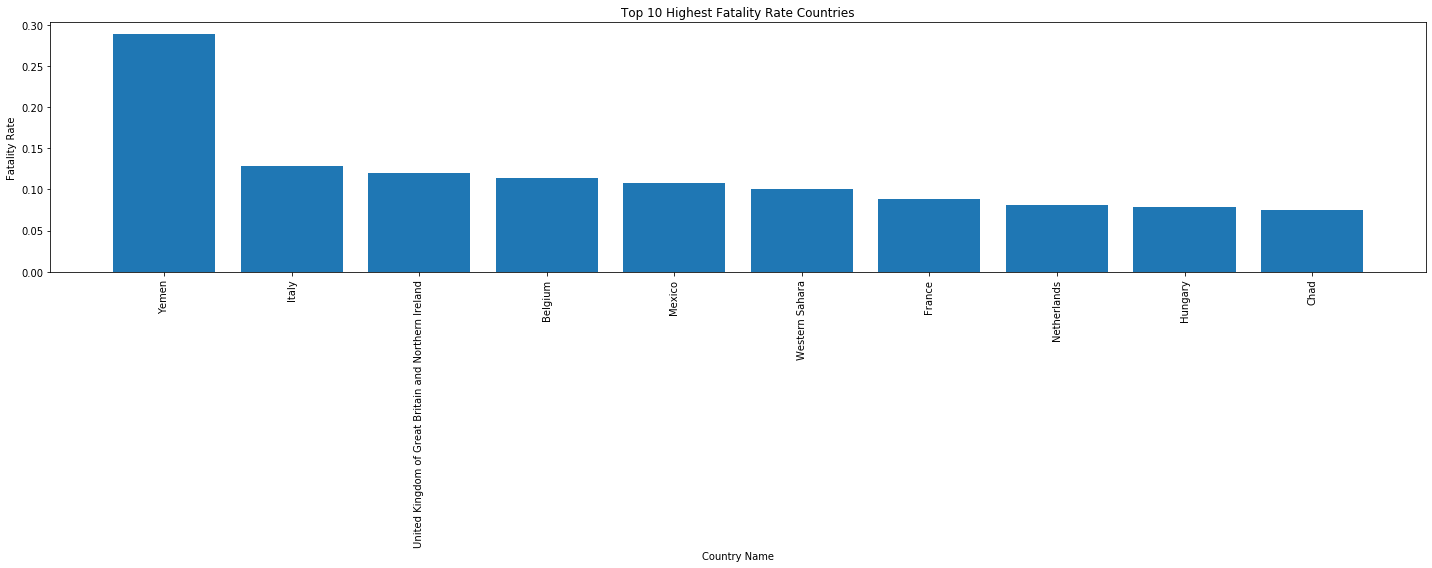

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
x = df_top_10_fatality_rate['name']
y = df_top_10_fatality_rate['fatality_ratio']
plt.bar(x,y)
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 10 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [53]:
# COVID-19 ASEAN
countries = ['ID','MY','SG','TH','VN','PH','BN','LA','MM','KH']
i = 0
for country in countries:
	covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
	df_covid_timeline = pd.json_normalize(get_json(covid_timeline_url))
	df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%dT%H:%M:%S')
	df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
	if i==0:
		df_covid_timeline_merged = df_covid_timeline
	else:
		df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
	i=i+1
    
print(df_covid_timeline_merged.head())

  country last_update  cases  deaths  recovered
0      KH  2020-09-06    274       0        272
1      KH  2020-09-05    274       0        272
2      KH  2020-09-04    274       0        272
3      KH  2020-09-03    274       0        271
4      KH  2020-09-02    274       0        266


In [54]:
df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries, on='country')
print(df_covid_timeline_denormalized)

     country last_update  cases  deaths  recovered       name
0         KH  2020-09-06    274       0        272   Cambodia
1         KH  2020-09-05    274       0        272   Cambodia
2         KH  2020-09-04    274       0        272   Cambodia
3         KH  2020-09-03    274       0        271   Cambodia
4         KH  2020-09-02    274       0        266   Cambodia
...      ...         ...    ...     ...        ...        ...
1907      ID  2020-03-10     27       0          2  Indonesia
1908      ID  2020-03-09     19       0          0  Indonesia
1909      ID  2020-03-08      6       0          0  Indonesia
1910      ID  2020-03-06      4       0          0  Indonesia
1911      ID  2020-03-02      2       0          0  Indonesia

[1912 rows x 6 columns]


In [55]:
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020, 3, 1))]

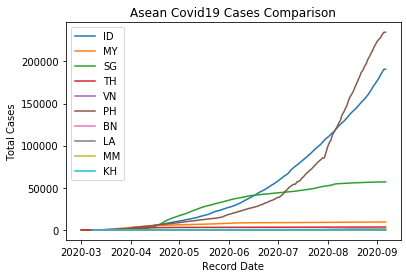

In [42]:
plt.clf()
countries = ['ID','MY','SG','TH','VN','PH','BN','LA','MM','KH']
for country in countries:
	country_data = df_covid_timeline_denormalized['country']==country
	x = df_covid_timeline_denormalized[country_data]['last_update']
	y = df_covid_timeline_denormalized[country_data]['cases']
	plt.plot(x, y, label = country)

plt.legend()
plt.xlabel('Record Date')
plt.ylabel('Total Cases')
plt.title('Asean Covid19 Cases Comparison')
plt.show()